In [1]:
from re import split
from fastai import *
from fastai.vision import *
from fastai.vision.all import *
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%pwd

'/home/qiao/dev/giao/havingfun/detecting/segmentation/unet34'

In [3]:
print(torch.cuda.is_available())

True


In [4]:
path = Path('/home/qiao/dev/giao/datasets/')

path_img = path/'S_kaggle_wildfire/'
path_label = path/'S_kaggle_wildfire_label/'
codes = ['Smoke', 'Flame', 'Cloud', 'Background']
path_img

Path('/home/qiao/dev/giao/datasets/S_kaggle_wildfire')

In [5]:
fnames = get_image_files(path_img)
print(fnames[0])

/home/qiao/dev/giao/datasets/S_kaggle_wildfire/000366.jpg


In [6]:
fnames = get_image_files(path_img)
print(fnames[0])
lbl_names = get_image_files(path_label)
print(lbl_names[0])

/home/qiao/dev/giao/datasets/S_kaggle_wildfire_label/label_000373.jpg


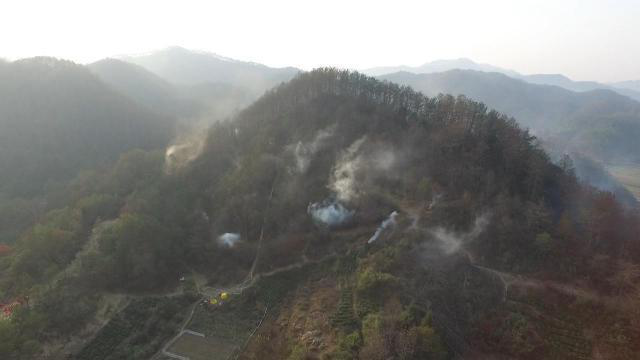

In [7]:
img = Image.open(fnames[0])
img.show()

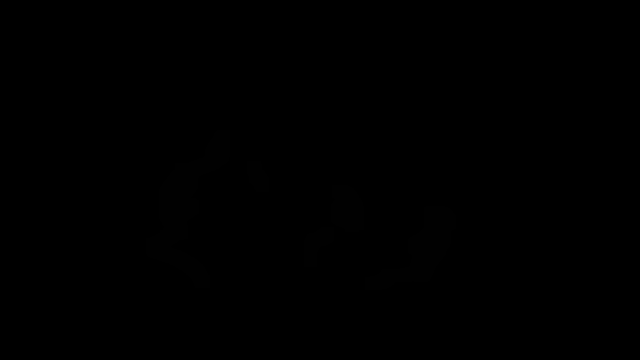

In [8]:
img = Image.open(lbl_names[0])
img.show()

In [9]:
get_y_fn = lambda x: path_label/f'label_{x.name}'
defaults.use_cuda = True

In [56]:
dls = SegmentationDataLoaders.from_label_func(
    path_img,
    bs = 2,
    fnames = fnames,
    label_func = get_y_fn,
    codes = codes,
    item_tfms = [Resize((400, 400))],
    batch_tfms = [Normalize.from_stats(*imagenet_stats)],
)

In [17]:
name2id = {v:k for k, v in enumerate(codes)}
void_code = name2id['Background']

def acc_smoke(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    # mask = target
    return (input.argmax(dim = 1)[mask]==target[mask]).float().mean()

metrics = acc_smoke

In [57]:
learn = unet_learner(dls, models.resnet34, metrics = metrics,
                    self_attention=True)

In [19]:
device = 'cuda'
learn.model.to(device)

DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05

In [20]:
# learn.model

SuggestedLRs(valley=9.999999747378752e-06)

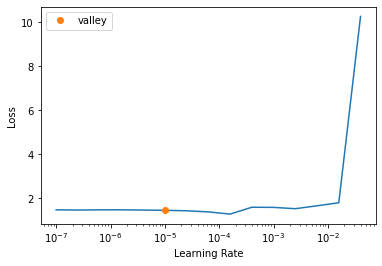

In [21]:
learn.lr_find(stop_div=False, num_it=20)

In [22]:
lr = 1e-5
learn.fit_one_cycle(15, slice(lr))

epoch,train_loss,valid_loss,acc_smoke,time
0,0.473656,0.416946,0.836203,01:15
1,0.267479,0.241171,0.909201,01:15
2,0.241223,0.206272,0.917978,01:12
3,0.213972,0.199402,0.916972,01:16
4,0.171037,0.208277,0.917799,01:16
5,0.166595,0.167813,0.931835,01:16
6,0.157137,0.163763,0.932255,01:17
7,0.134591,0.160745,0.932735,01:16
8,0.132009,0.167677,0.932137,01:17
9,0.122652,0.167501,0.933098,01:18


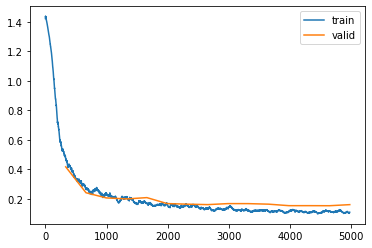

In [23]:
learn.recorder.plot_loss(skip_start=0, with_valid=True)

In [24]:
learn.save('2022516stage1')
learn.load('2022516stage1')

SuggestedLRs(valley=8.31763736641733e-06)

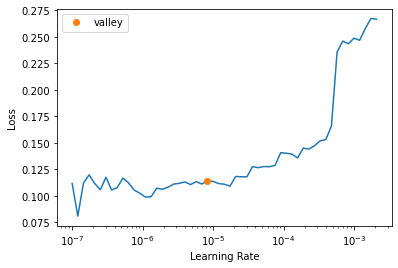

In [25]:
learn.unfreeze()
learn.lr_find()

In [26]:
lr_max = 9e-7

In [27]:
learn.fit_one_cycle(5, lr_max)

epoch,train_loss,valid_loss,acc_smoke,time
0,0.107205,0.154840,0.936181,01:26
1,0.109490,0.158805,0.935223,01:26
2,0.105920,0.150401,0.938483,01:25
3,0.111506,0.155322,0.936660,01:25
4,0.108024,0.157946,0.936438,01:26


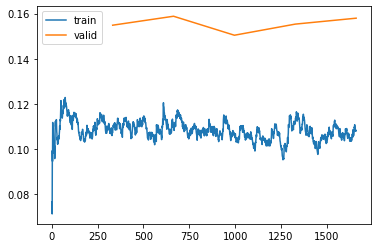

In [28]:
learn.recorder.plot_loss(skip_start=0, with_valid=True)

Path('/home/qiao/dev/giao/datasets/S_kaggle_wildfire/models/20220516_attunet_res34.pth')

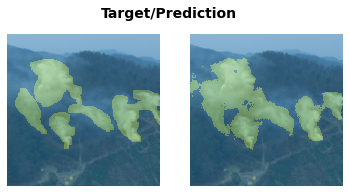

In [29]:
learn.show_results()
learn.save('20220516_attunet_res34')

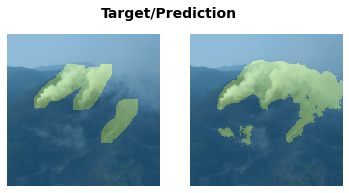

In [30]:
# learn.show_results()
learn.load('20220516_attunet_res34')
learn.show_results()

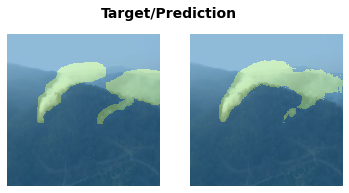

In [31]:
learn.show_results()

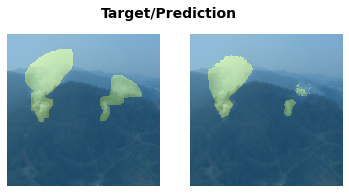

In [32]:
learn.show_results()

Path('/home/qiao/dev/giao/datasets/S_kaggle_wildfire/models/alunet.pth')

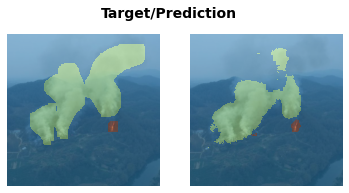

In [33]:
learn.show_results()
learn.save('alunet')

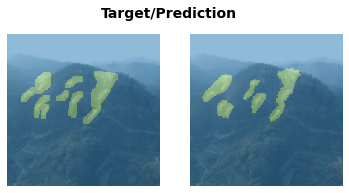

In [34]:
learn.show_results()

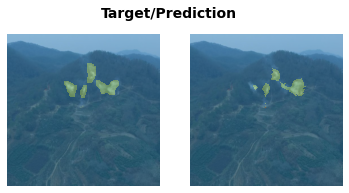

In [35]:
learn.show_results()

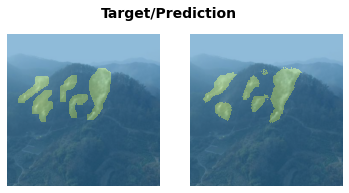

In [36]:
learn.show_results()

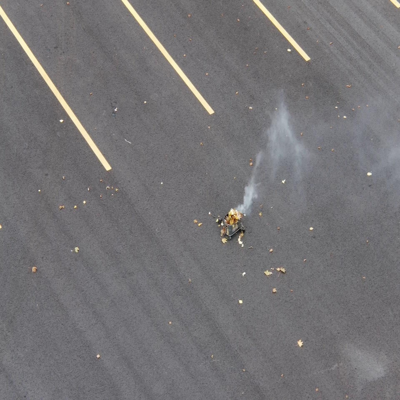

<PIL.Image.Image image mode=RGB size=400x400 at 0x7F459C07E640>


In [68]:
# one time test
import cv2
import numpy as np
from PIL import Image

img = cv2.imread('/home/qiao/dev/giao/datasets/bounding/images/DJI_20211017111122_0003_Z_MP4_1.png')

# You may need to convert the color.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
im_pil = Image.fromarray(img).resize((400, 400))
im_pil.show()
print(im_pil)

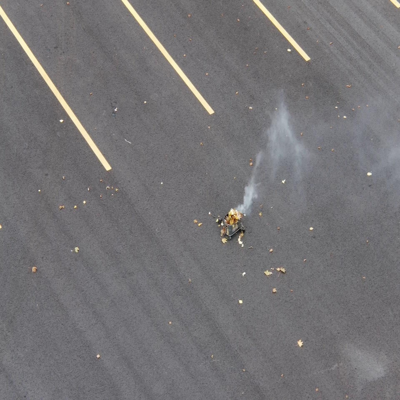

In [79]:
pilimg = Image.open('/home/qiao/dev/giao/datasets/bounding/images/DJI_20211017111122_0003_Z_MP4_1.png').resize((400, 400))
pilimg.show()
img = PILImage(pilimg)

In [80]:
learn.load('20220516_attunet_res34')
# learn.load('attunet')

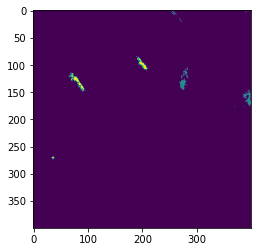

In [81]:
# pilimg = PILImage(im_pil)
prediction_mask = learn.predict(img)
seg_map = prediction_mask[0]
torch.Tensor.ndim = property(lambda self: len(self.shape))
plt.imshow(seg_map)

In [ ]:
##########################################
#  Test part  ############################
##########################################

In [1]:
# testing dependencies
import os
import cv2

from re import split
from fastai import *
from fastai.vision import *
from fastai.vision.all import *
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = Path('/home/qiao/dev/giao/datasets/')

path_img = path/'S_kaggle_wildfire/'
path_label = path/'S_kaggle_wildfire_label/'
codes = ['Smoke', 'Flame', 'Cloud', 'Background']
path_img

Path('/home/qiao/dev/giao/datasets/S_kaggle_wildfire')

In [3]:
# still loading the traning dls (dataloaders)
fnames = get_image_files(path_img)
print(fnames[0])
lbl_names = get_image_files(path_label)
print(lbl_names[0])

/home/qiao/dev/giao/datasets/S_kaggle_wildfire/000366.jpg
/home/qiao/dev/giao/datasets/S_kaggle_wildfire_label/label_000373.jpg


In [4]:
# connections between images and masks
get_y_fn = lambda x: path_label/f'label_{x.name}'
defaults.use_cuda = True

dls = SegmentationDataLoaders.from_label_func(
    path_img,
    bs = 1,
    fnames = fnames,
    label_func = get_y_fn,
    codes = codes,
    item_tfms = [Resize((400, 400))],
    batch_tfms = [Normalize.from_stats(*imagenet_stats)],
)

/home/qiao/anaconda3/envs/dev/lib/python3.9/site-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


In [5]:
name2id = {v:k for k, v in enumerate(codes)}
void_code = name2id['Background']

def acc_smoke(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    # mask = target
    return (input.argmax(dim = 1)[mask]==target[mask]).float().mean()

metrics = acc_smoke

In [6]:
# model information
learn = unet_learner(dls, models.resnet34, metrics = metrics,
                    self_attention=True)

device = 'cuda'
learn.model.to(device)

DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05

In [7]:
# load the trained parameters into the model
learn.load('20220516_attunet_res34')

In [132]:
# get the test image folder
test_path = '/home/qiao/dev/giao/datasets/bounding/images'
test_fnames = get_image_files(test_path)

# test whether successfully loaded
print(f'======> example name: {test_fnames[0]}')

======> example name: /home/qiao/dev/giao/datasets/bounding/images/DJI_20211017111122_0003_Z_MP4_12.png


<PIL.Image.Image image mode=RGB size=960x770 at 0x7FF8E7B00F40>
PILImage mode=RGB size=960x770
DJI_20211017111122_0003_Z_MP4_12.png


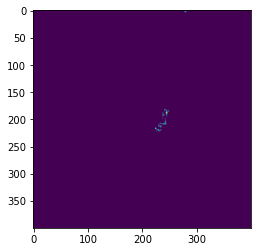

In [150]:
# test of one_time prediction example
pilimg = Image.open(test_fnames[0]).resize((960, 770))
print(pilimg)
test_img = PILImage(pilimg)
print(test_img)
print(test_fnames[0].name)

test_pred_all = learn.predict(test_img)
test_pred = test_pred_all[0]
plt.imshow(test_pred)
# test_pred.resize((960, 770))
# test_pred = Image.fromarray(test_pred).resize((960, 770))
# plt.imshow(test_pred)
plt.savefig(f'predmask_{test_fnames[0].name}')

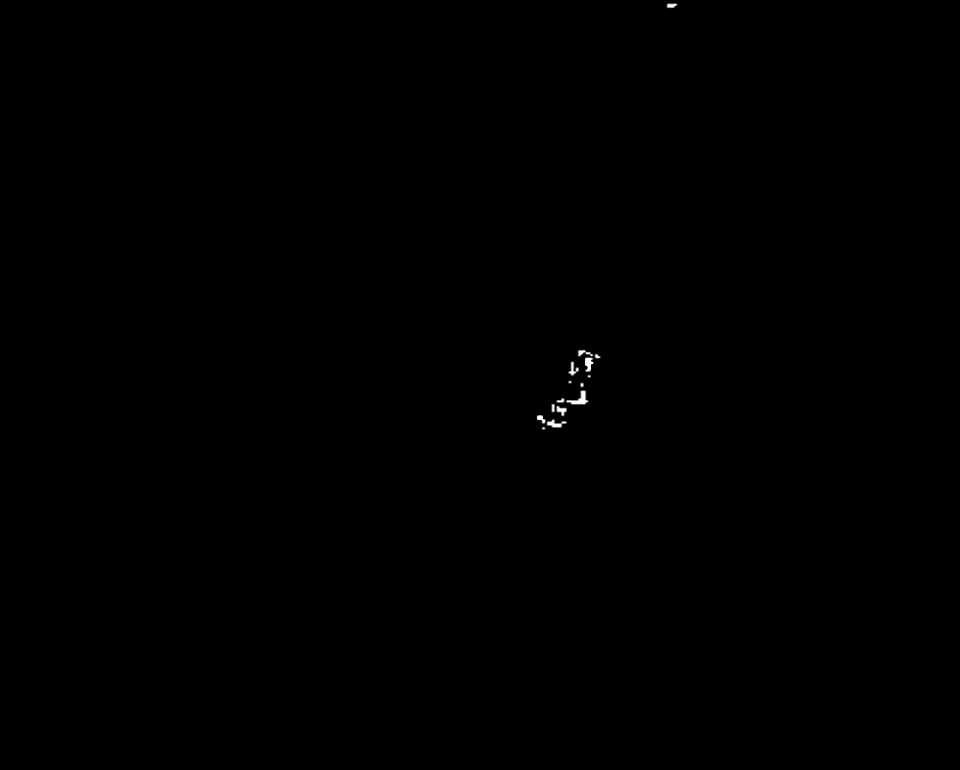

torch.int64
float64
<PIL.Image.Image image mode=RGB size=960x770 at 0x7FF8E74B9E50>


In [151]:
# transform and convert
test_pred_torch = test_pred # torch.int64
test_pred_int64 = test_pred_torch.numpy() * 255 # torch.int64 --> np.int64
test_pred_float64 = np.asarray(test_pred_int64, dtype = np.float64,  # np.int64 --> np.float64
                        order ='C')

test_pred_pil = Image.fromarray(test_pred_float64).resize((960, 770)).convert("RGB")
test_pred_pil.show()
print(test_pred.dtype)
print(test_pred_float64.dtype)
print(test_pred_pil)

In [152]:
# to know how many images are going to be predicted
total_number = len(test_fnames)
print(f'======> There are totally {total_number} images going to be predicted.')    

======> There are totally 43 images going to be predicted.


In [153]:
# get the testing time
from datetime import datetime

now = datetime.now()
date_time = now.strftime('%Y%m%d%H%M') # Y for year, m for month, d for day, H for hour, M for minute, S for second
print(f'======> The time: {date_time}')

======> The time: 202205201400


In [154]:
# build the folder to store predicted masks
import os
import pathlib

test_pred_path = pathlib.Path(f"/home/qiao/dev/giao/datasets/bounding/pred_{date_time}" )
test_pred_path.mkdir(parents=True, exist_ok=True)

print(f'======> created the folder: {test_pred_path}')

======> created the folder: /home/qiao/dev/giao/datasets/bounding/pred_202205201400


In [155]:
# save resized mask to particular folder
test_pred_pil.save(f'{test_pred_path}/predmask_{test_fnames[0].name}', 'PNG')

In [162]:
# process the images one by one with a 'for loop'
from tqdm import tqdm

for test_fname in test_fnames:
    # load
    test_pilimgimg = Image.open(test_fname).resize((960, 770))
    test_pilimg = PILImage(test_pilimgimg)

    # predict
    test_pred_torch_all = learn.predict(test_pilimg)
    test_pred_torch= test_pred_torch_all[0]

    # convert
    test_pred_int64 = test_pred_torch[i].numpy() * 255 # torch.int64 --> np.int64
    test_pred_float64 = np.asarray(test_pred_int64, dtype = np.float64, order ='C') # np.int64 --> np.float64
    test_pred_pil = Image.fromarray(test_pred_float64).resize((960, 770)).convert('RGB')

    # save
    test_pred_pil.save(f'{test_pred_path}/predmask_{test_fname.name}', 'PNG')
    
    # count
    count = []
    i += 1
    count.append(i)
    print(f'======> No.{count} predicted mask saved!')
    

print('\n======> Mission accomplished!!!')

======> No.[46] predicted mask saved!


======> No.[47] predicted mask saved!


======> No.[48] predicted mask saved!


======> No.[49] predicted mask saved!


======> No.[50] predicted mask saved!


======> No.[51] predicted mask saved!


======> No.[52] predicted mask saved!


======> No.[53] predicted mask saved!


======> No.[54] predicted mask saved!


======> No.[55] predicted mask saved!


======> No.[56] predicted mask saved!


======> No.[57] predicted mask saved!


======> No.[58] predicted mask saved!


======> No.[59] predicted mask saved!


======> No.[60] predicted mask saved!


======> No.[61] predicted mask saved!


======> No.[62] predicted mask saved!


======> No.[63] predicted mask saved!


======> No.[64] predicted mask saved!


======> No.[65] predicted mask saved!


======> No.[66] predicted mask saved!


======> No.[67] predicted mask saved!


======> No.[68] predicted mask saved!


======> No.[69] predicted mask saved!


======> No.[70] predicted mask saved!


======> No.[71] predicted mask saved!


======> No.[72] predicted mask saved!


======> No.[73] predicted mask saved!


======> No.[74] predicted mask saved!


======> No.[75] predicted mask saved!


======> No.[76] predicted mask saved!


======> No.[77] predicted mask saved!


======> No.[78] predicted mask saved!


======> No.[79] predicted mask saved!


======> No.[80] predicted mask saved!


======> No.[81] predicted mask saved!


======> No.[82] predicted mask saved!


======> No.[83] predicted mask saved!


======> No.[84] predicted mask saved!


======> No.[85] predicted mask saved!


======> No.[86] predicted mask saved!


======> No.[87] predicted mask saved!


======> No.[88] predicted mask saved!

======> Mission accomplished!!!
